# <font color = "green" > <b><i>Exam_mark_prediction_using_LINEAR_REGRESSION_MULTIPLE_VALUES</b>
<b><i>NAKKA SHEKHAR</b>
* [linkedin](https://www.linkedin.com/in/nakka-shekhar-2019a987/)
* [github](https://github.com/shekhar443/MACHINE-LEARNING-PROJECT)

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data Profiling / Data Loading

In [2]:
df=pd.read_csv("ML/data12.csv")

## Summarize Dataset

In [3]:
df.head()

,hours,age,internet,marks
0,6.83,15,1,78.50
1,6.56,16,0,76.74
2,NaN,17,1,78.68
3,5.67,18,0,71.82
4,8.67,19,1,84.19


In [4]:
df.tail()

,hours,age,internet,marks
196,8.56,19,1,84.68
197,8.94,20,1,86.75
198,6.60,15,1,78.05
199,8.35,16,1,83.50
200,4.15,15,0,81.45


In [5]:
df.columns

Index(['hours', 'age', 'internet', 'marks'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hours     196 non-null    float64
 1   age       201 non-null    int64  
 2   internet  201 non-null    int64  
 3   marks     201 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 6.4 KB


In [7]:
df.describe()

,hours,age,internet,marks
count,196.000000,201.000000,201.000000,201.000000
mean,6.981429,17.467662,0.552239,77.951244
std,1.266266,1.720523,0.498505,4.919626
min,4.150000,15.000000,0.000000,68.570000
25%,5.757500,16.000000,0.000000,73.400000
50%,7.110000,17.000000,1.000000,77.770000
75%,8.082500,19.000000,1.000000,82.300000
max,8.990000,20.000000,1.000000,86.990000


## Check Null Values and Duplicate Values

In [8]:
df.isnull().sum()

hours       5
age         0
internet    0
marks       0
dtype: int64

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.isnull().sum()

hours       0
age         0
internet    0
marks       0
dtype: int64

In [11]:
df.duplicated().sum()

0

## Graphical Analysis

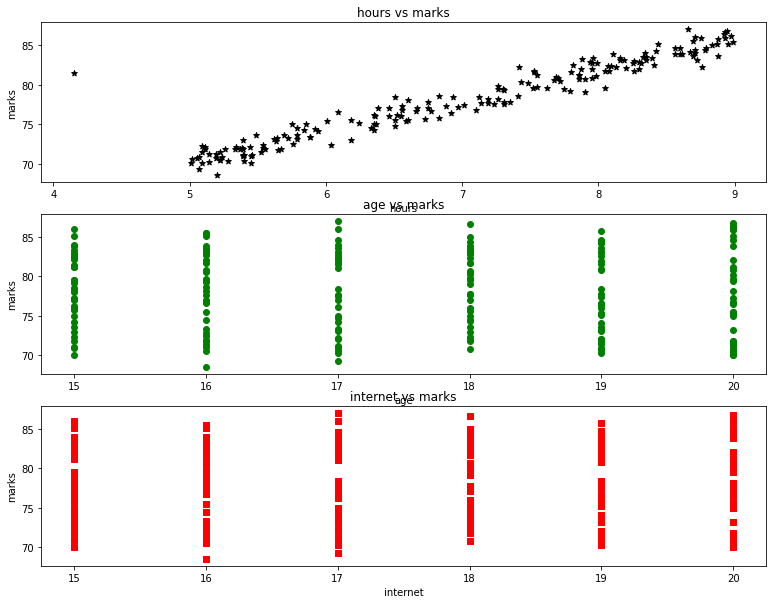

In [12]:
plt.figure(figsize=(13,10))

plt.subplot(3,1,1)
plt.scatter(df.hours,df.marks,color="k",marker="*")
plt.title("hours vs marks")
plt.xlabel("hours")
plt.ylabel("marks")
plt.subplot(3,1,2)
plt.scatter(df.age,df.marks,color="g",marker="o")
plt.title("age vs marks")
plt.xlabel("age")
plt.ylabel("marks")
plt.subplot(3,1,3)
plt.scatter(df.age,df.marks,color="r",marker="s")
plt.title("internet vs marks")
plt.xlabel("internet")
plt.ylabel("marks")
plt.show()

## Segregate Data into X and y(Independent and Independent Features)

In [13]:
X=df.iloc[:,:-1].values

In [14]:
X

array([[ 6.83, 15.  ,  1.  ],
       [ 6.56, 16.  ,  0.  ],
       [ 5.67, 18.  ,  0.  ],
       [ 8.67, 19.  ,  1.  ],
       [ 7.55, 20.  ,  0.  ],
       [ 6.67, 15.  ,  0.  ],
       [ 8.99, 16.  ,  0.  ],
       [ 5.19, 17.  ,  1.  ],
       [ 6.75, 18.  ,  0.  ],
       [ 6.59, 19.  ,  0.  ],
       [ 8.56, 20.  ,  1.  ],
       [ 7.75, 15.  ,  0.  ],
       [ 7.9 , 16.  ,  1.  ],
       [ 8.19, 17.  ,  0.  ],
       [ 6.55, 18.  ,  1.  ],
       [ 6.36, 19.  ,  0.  ],
       [ 8.44, 20.  ,  1.  ],
       [ 8.41, 15.  ,  0.  ],
       [ 7.67, 16.  ,  1.  ],
       [ 7.42, 17.  ,  1.  ],
       [ 8.16, 18.  ,  1.  ],
       [ 5.05, 19.  ,  1.  ],
       [ 5.85, 20.  ,  1.  ],
       [ 5.45, 15.  ,  0.  ],
       [ 7.96, 16.  ,  0.  ],
       [ 6.51, 17.  ,  0.  ],
       [ 6.73, 18.  ,  0.  ],
       [ 5.94, 19.  ,  1.  ],
       [ 7.48, 20.  ,  0.  ],
       [ 8.13, 15.  ,  1.  ],
       [ 5.4 , 17.  ,  1.  ],
       [ 8.78, 18.  ,  0.  ],
       [ 8.72, 19.  ,  1.  ],
       [ 7

In [15]:
y=df.iloc[:,-1].values

In [16]:
y

array([78.5 , 76.74, 71.82, 84.19, 81.18, 76.99, 85.46, 70.66, 77.82,
       75.37, 83.88, 79.5 , 80.76, 83.08, 76.03, 76.04, 85.11, 82.5 ,
       80.58, 82.18, 83.36, 70.67, 75.02, 70.96, 83.33, 74.75, 75.65,
       74.15, 80.17, 82.27, 71.1 , 84.35, 83.08, 76.76, 81.24, 78.21,
       73.08, 83.23, 70.27, 86.41, 71.1 , 82.84, 82.38, 72.96, 77.46,
       70.11, 72.38, 71.41, 72.22, 77.77, 84.44, 71.45, 82.21, 85.48,
       75.03, 86.65, 70.9 , 71.7 , 73.61, 79.41, 76.19, 80.43, 85.78,
       70.06, 81.25, 81.7 , 69.27, 82.79, 71.8 , 71.79, 74.97, 78.61,
       77.59, 72.33, 72.08, 77.33, 70.05, 73.34, 84.  , 82.93, 76.63,
       75.36, 77.29, 72.87, 73.4 , 81.74, 71.85, 84.6 , 79.56, 82.1 ,
       72.08, 79.1 , 81.01, 76.48, 68.57, 83.64, 82.3 , 75.18, 82.03,
       82.99, 79.26, 77.55, 77.07, 72.1 , 73.25, 74.25, 70.58, 81.08,
       75.04, 76.38, 80.86, 78.42, 74.44, 70.34, 85.04, 73.61, 75.55,
       76.2 , 82.69, 79.53, 83.57, 85.95, 76.02, 77.65, 77.01, 74.49,
       73.19, 71.86,

## Splitting data into Train and Test

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## Model Building and Training

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
lr.coef_

array([ 3.70704464, -0.08535028, -0.03065625])

In [21]:
lr.intercept_

53.61974976356879

## Prediction for all test data

In [22]:
y_pred=lr.predict(X_test)

In [23]:
y_pred

array([76.0456048 , 72.18683608, 83.16954471, 76.23095703, 80.05218492,
       73.46188293, 70.82508605, 85.15669714, 80.65652145, 71.23286096,
       80.51168195, 75.57489838, 72.02734491, 75.70852849, 73.09117847,
       84.78599268, 85.16493461, 76.42751865, 74.44333813, 84.59719816,
       73.68727753, 74.48864605, 80.91945686, 70.48503783, 81.89449786,
       82.66656303, 77.62795423, 73.54723321, 72.15617984, 71.87426794,
       77.84396271, 80.33112491, 72.79117261, 81.76222064, 79.59613018,
       85.08735143, 71.94840883, 79.64441001, 76.25634771, 71.17769656,
       77.06548333, 82.87433404, 84.04937894, 75.09939678, 79.21421633,
       78.69178779, 83.20796805, 81.50914172, 78.90779627])

## Prediction for new data

In [24]:
Hours=5
Age=22
Internet=0
marks=[[Hours,Age,Internet]]
marksResult=lr.predict(marks)
print("marks: {}".format(marksResult))

marks: [70.27726683]
